In [1]:
#test for correct tf installation
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

result = tf.add(x1, x2)
result1 = tf.multiply(x1, x2)

with tf.Session() as sess:
    output = sess.run(result)
    output1 = sess.run(result1)
    print(output)
    print(output1)

# Close the session
sess.close()

Instructions for updating:
non-resource variables are not supported in the long term
[ 6  8 10 12]
[ 5 12 21 32]


In [39]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

In [ ]:
#Belgium traffic signs classifying activity

In [3]:
#STEP 1: data

import os
import numpy as np
import skimage
from skimage.io import imread
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/srividyaraghavan/Downloads"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_directory)

hello


In [4]:
images_array = np.array(images)
labels_array = np.array(labels)

#images dimensions
print(images_array.ndim)

#number of images elements
print(images_array.size)

images[0]

#dimensions of labels
print(labels_array.ndim)

#number of elements in lavels
print(labels_array.size)

#number of labels
print(len(set(labels_array)))

1
4575
1
4575
62


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


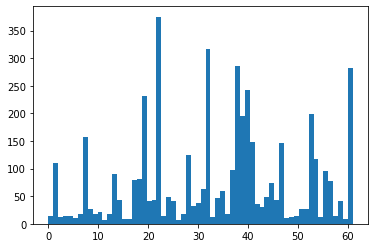

In [5]:
#plotting w/ matplotlib

import matplotlib.pyplot as plt

#creating a histogram with 62 bins from the labels data
plt.hist(labels, 62)
plt.show()


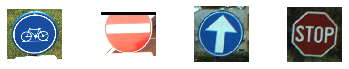

shape: (123, 123, 3), min: 0, max: 215


In [6]:
#analyzing dataset


#random indicies of images I want to see
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    
    #show image at index i
    plt.imshow(images[traffic_signs[i]])
    
    #adjust the width between the images
    plt.subplots_adjust(wspace=0.7)
    
plt.show()

#conclusion: images are not the same size, so must be resized
#confirm:
print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

In [ ]:
'''
STEP 2
manipulate data so it can be valid to feed to neural network
- rescale images so sizes are equal
- convert images to grayscale
'''

In [7]:
#rescaling the images with Scikit-Learn image lib
from skimage import transform

#rescale images in array to 28x28
images28 = [transform.resize(image, (28, 28))
            for image in images]
images28 = np.array(images28)#images28 now contains all images in a 28x28 format

In [8]:
#convert to grayscale with skimage
from skimage.color import rgb2gray

#convert to gray
images28 = rgb2gray(images28)

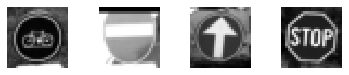

In [26]:
#check that the rescaling & recoloring worked
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    
    #without 'cmap="gray"' it would show default imshow() colors: heatmap-like colors
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)

In [78]:
#Step 3: Constructing the Neural Network
#initialize placeholders - variables that data will be assigned to during run()
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

#flatten the input data - converting it into a 1D array
#images_flat = tf.contrib.layers.flatten(x)
images_flat = tf.compat.v1.layers.Flatten()(x)

#fully connected layer
logits = tf.compat.v1.layers.dense(images_flat, 62, tf.nn.relu)
#define loss function for classification
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
#optimizer with learning rate of 0.001
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
#logits --> labels
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


#print recap
print("images_flat: ",images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ",correct_pred)

images_flat:  Tensor("flatten_6/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("dense_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [79]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 

In [80]:
## Evaluate the model ##


#loading test data
test_images, test_labels = load_data(test_data_directory)

#make into 28x28
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

#grayscale

test_images28 = rgb2gray(np.array(test_images28))

#run predictions vs the test set
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

#calculate matches
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

#accuracy
accuracy = match_count / len(test_labels)

#print accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.442


[1, 13, 30, 38, 56, 38, 35, 39, 20, 41]
[38 13 28 38 56 38 61 39 28 41]


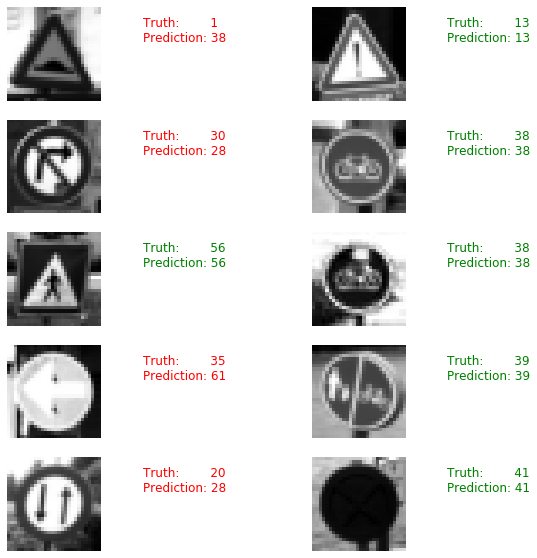

In [86]:
#showing predictions visually
import random

#pick 10 random images from images28 dataset
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
#print actual vs predicted labels
print(sample_labels)
print(predicted)

#display
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()